In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt

In [88]:
symbol_1_data = pd.read_csv('D:/BA Future/2021.08.18/VN30F1M.csv',
                            index_col=0, usecols = [0,1,2], names = ['Datetime', 'Bid', 'Ask'], parse_dates=True)
symbol_2_data = pd.read_csv('D:/BA Future/2021.08.18/VN30F2M.csv',
                            index_col=0, usecols = [0,1,2], names = ['Datetime', 'Bid', 'Ask'], parse_dates=True)

In [89]:
symbol_1_close = symbol_1_data.resample("1T",label='left', closed='right').last().dropna()
symbol_2_close = symbol_2_data.resample("1T",label='left', closed='right').last().dropna()

In [90]:
data = pd.merge_ordered(symbol_1_close, symbol_2_close,on='Datetime').dropna()

In [91]:
data['Ask_x'] = data['Ask_x'].str.replace(',', '').astype(float)
data['Bid_y'] = data['Bid_y'].str.replace(',', '').astype(float)
data['Ask_y'] = data['Ask_y'].str.replace(',', '').astype(float)
data['Bid_x'] = data['Bid_x'].str.replace(',', '').astype(float)
data['x-y'] = data['Ask_x'] - data['Bid_y']
data['y-x'] = data['Ask_y'] - data['Bid_x']

In [92]:
data['up_1'], data['mid_1'], data['low_1'] = ta.BBANDS(data['x-y'], nbdevup=2, nbdevdn=2, timeperiod =20)
data['up_2'], data['mid_2'], data['low_2'] = ta.BBANDS(data['y-x'], nbdevup=2, nbdevdn=2, timeperiod =20)

<AxesSubplot:>

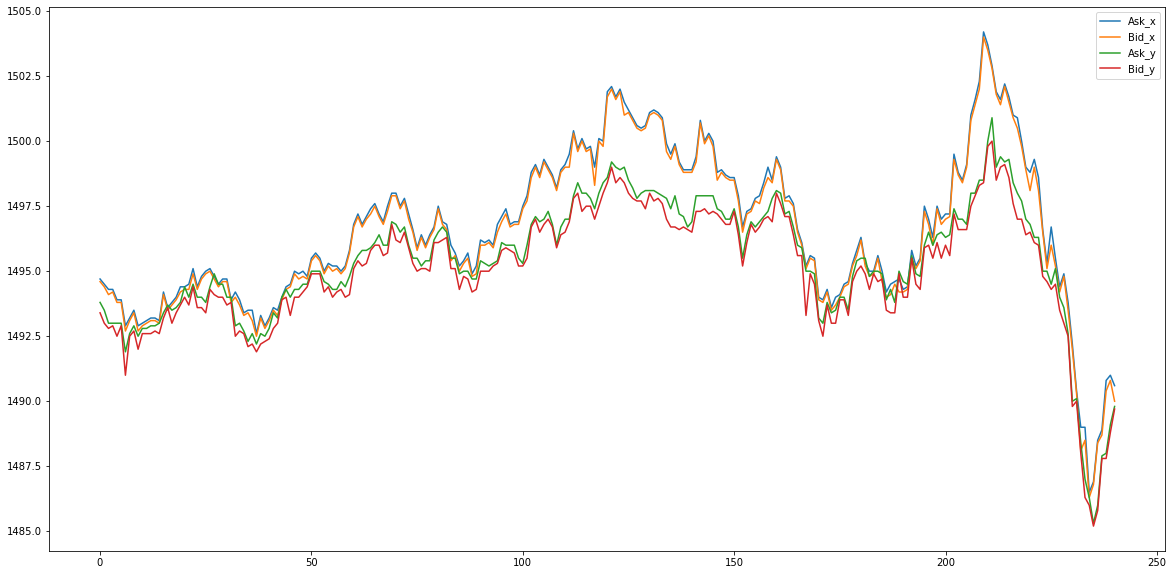

In [93]:
data[['Ask_x','Bid_x','Ask_y','Bid_y']].plot(figsize = (20,10))

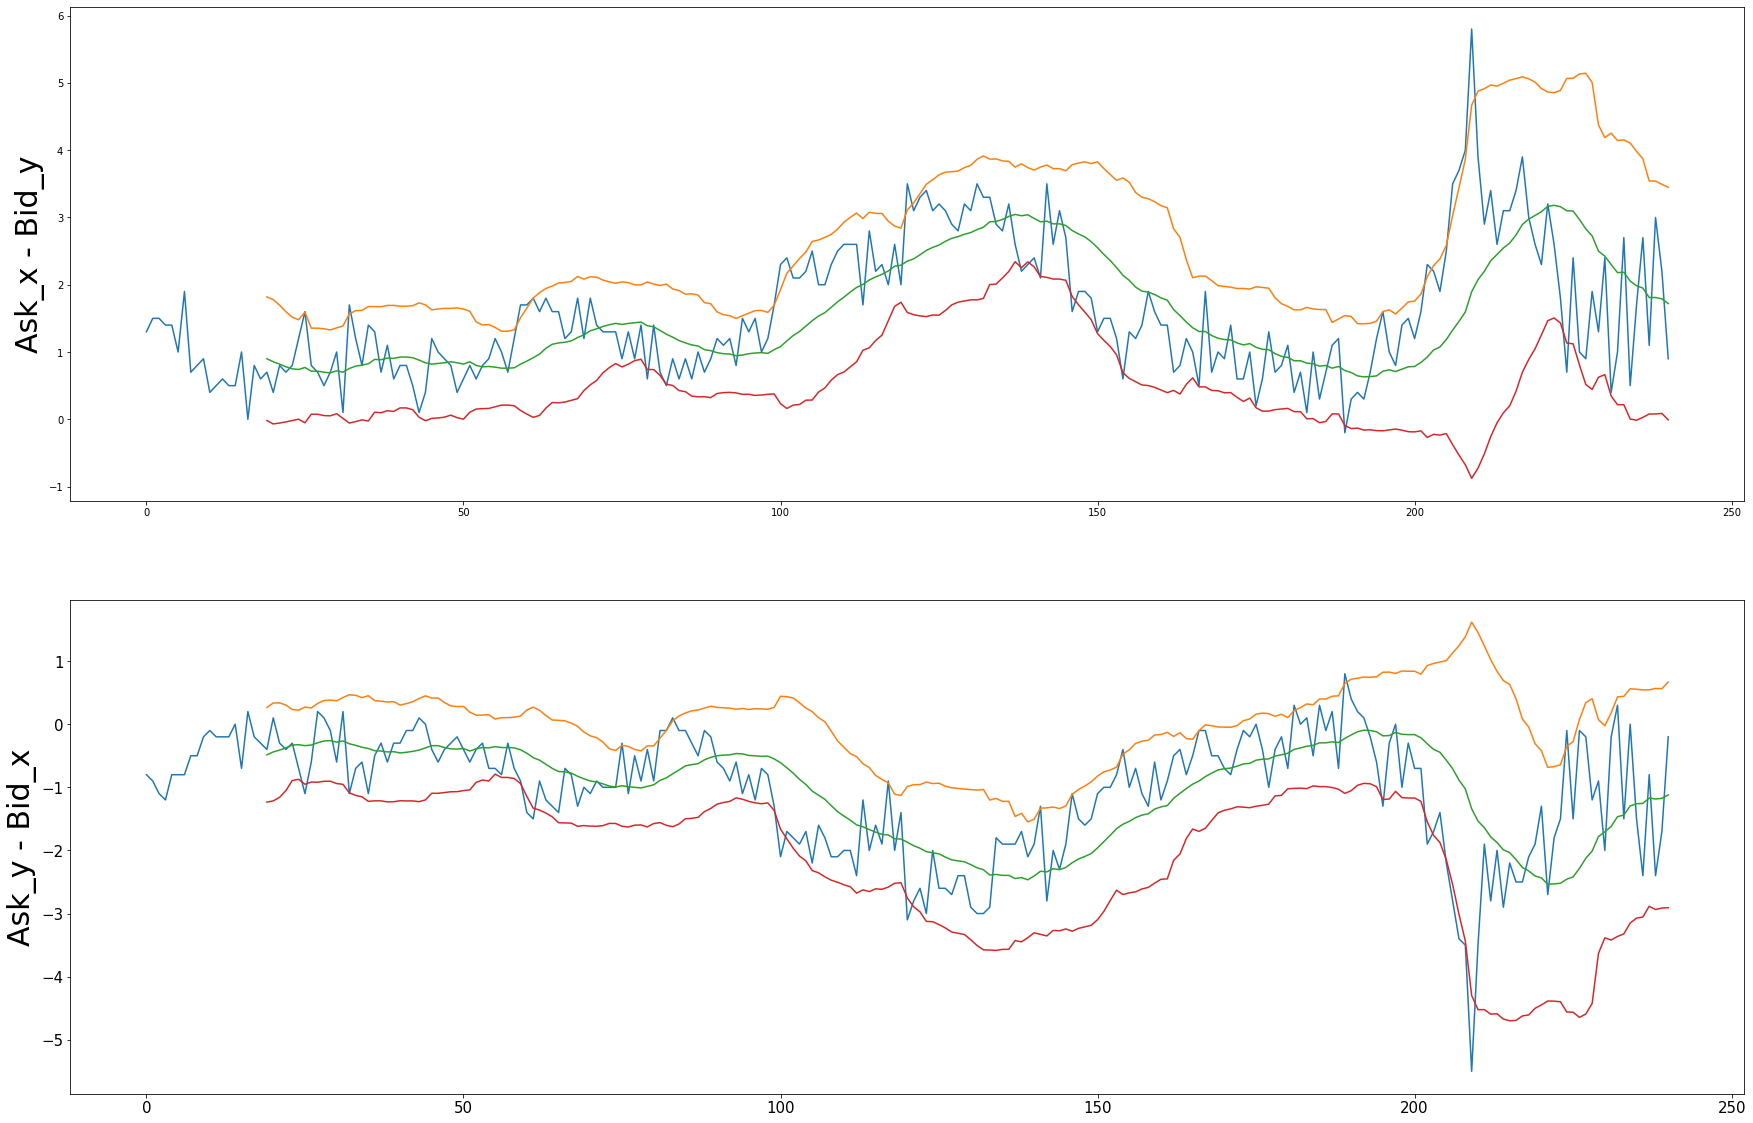

In [94]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(data[['x-y','up_1','mid_1','low_1']])
ax[1].plot(data[['y-x','up_2','mid_2','low_2']])
ax[0].set_ylabel('Ask_x - Bid_y', fontsize = 30)
ax[1].set_ylabel('Ask_y - Bid_x', fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
fig.set_size_inches([30, 20])
plt.show()

In [95]:
#Ask_x - Bid_y > SMA => (1) Short_x & Long_y => (2) Long_x & Short_y
#Ask_y - Bid_x > SMA => (1) Long_x & Short_y => (2) Short_x & Long_y